In [7]:
import warnings
warnings.filterwarnings("ignore")

# Names

In [1]:
# get the male names list

import names
import nltk

names = nltk.corpus.names

names.fileids()
male_names = names.words("male.txt")
#len(male_names)
#male_names
#male_names = pd.DataFrame(male_names) convert it to dataframe

In [2]:
import names
import nltk

names = nltk.corpus.names

names.fileids()
female_names = names.words("female.txt")
len(female_names)
#female_names

5001

In [3]:
total = male_names + female_names
len(total)

7944

In [17]:
"Vijay" in male_names

True

In [18]:
# create the logfile
import scraping_class
logfile = 'log_Exam.csv'## name your log file.
connector = scraping_class.Connector(logfile)

# Work with the movies start from here

In [6]:
import scraping_class
logfile = 'log.csv'## name your log file.
connector = scraping_class.Connector(logfile)

In [7]:
#Defining url, the call and parsing
from bs4 import BeautifulSoup
import requests
url = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page=1&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'
response,callid = connector.get(url,'Exam')
html = response.text
soup = BeautifulSoup(html,'lxml')

#Here we define what node we are looking at
h3_node = soup.find('h3') # find table node with specific attribute

h3_node





<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt7131622/">Once Upon a Time... in Hollywood</a>
<span class="lister-item-year text-muted unbold">(2019)</span>
</h3>

In [11]:
#This is used to extract the names of the movies

headline = soup.find('h3') # search for the first headline: h1 tag. 
name = headline['class'][0].strip() # use the class attribute name as column name.
value = headline.text.strip() # extract text using build in method.
#print(name,':',value)
value.split('\n')[1]

'Once Upon a Time... in Hollywood'

In [12]:
# scrape the title
movielist= []

for v in range(1, 100):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method.
        film = value.split('\n')[1]
        movielist.append(film)
    
movielist

KeyboardInterrupt: 

In [ ]:
# scrape the title
import re
directorlist= []

for v in range(1, 2):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):

        headline_i = soup.findAll("p", {"class":"text-muted text-small"})[i] # search for the first headline: h1 tag. 
        #headline_2 = headline_i.find("Director")             
        value = headline_i.text.strip()
        film = value.split('\n')
        directorlist.append(film)
    
str(directorlist[1]).split(",")[1]

# Dataset

In [3]:
import pandas as pd

df = pd.read_csv("/Users/moritzschneider/Documents/Uni/Copenhagen/Social Data Science/Git Group/Group-31-SoDa/Data/movie_1.csv", index_col=0)
                 
df = df.reset_index()
df

,index,Title,Year,Rating,Gross,Director,Summary,Top Star,Genre 1,Genre 2,Genre 3,Female,d_Female,d_Drop
0,0,En verden udenfor,1994,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Drama,NaN,NaN,0.0,0.0,0.0
1,1,The Dark Knight,2008,9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Action,Crime,Drama,0.0,0.0,0.0
2,2,Inception,2010,8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Action,Adventure,Sci-Fi,0.0,0.0,0.0
3,3,Fight Club,1999,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Drama,NaN,NaN,0.0,0.0,0.0
4,4,Pulp Fiction,1994,8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Crime,Drama,NaN,0.0,0.0,0.0
5,5,Forrest Gump,1994,8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Drama,Romance,NaN,0.0,0.0,0.0
6,6,The Matrix,1999,8.7,171.48,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,Keanu Reeves,Action,Sci-Fi,NaN,0.0,1.0,0.0
7,7,Ringenes herre: Eventyret om ringen,2001,8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
8,8,Ringenes herre: Kongen vender tilbage,2003,8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
9,9,The Dark Knight Rises,2012,8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Action,Thriller,NaN,0.0,0.0,0.0


# Data Cleaning

In [25]:
len(df)

8264

In [8]:
# clean Gross column
#df["Gross"] = df["Gross"].str.replace("M","") # already done in the csv
#df["Gross"] = df["Gross"].str.replace("$","") # already done in the csv
#df["Director"] = df["Director"].str.replace('"',"")
df = df.rename({"Gross": "Gross in M$"}, axis=1)
#df

In [9]:
# convert string values in Gross to float
df["Gross in M$"] = df["Gross in M$"].convert_objects(convert_numeric=True)

/Users/moritzschneider/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [5]:
for e in range(0,8264):
    if "[" in df["Director"][e]:
        df["Director"][e] = df["Director"][e].split(",")[0].replace("[","").replace("'","")
        print(df["Director"][e])
    else:
        pass

df["Director"]
df = df.drop(columns="index")

In [10]:
df

,Title,Year,Rating,Gross in M$,Director,Summary,Top Star,Genre 1,Genre 2,Genre 3,Female,d_Female,d_Drop
0,En verden udenfor,1994,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Drama,NaN,NaN,0.0,0.0,0.0
1,The Dark Knight,2008,9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Action,Crime,Drama,0.0,0.0,0.0
2,Inception,2010,8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Action,Adventure,Sci-Fi,0.0,0.0,0.0
3,Fight Club,1999,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Drama,NaN,NaN,0.0,0.0,0.0
4,Pulp Fiction,1994,8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Crime,Drama,NaN,0.0,0.0,0.0
5,Forrest Gump,1994,8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Drama,Romance,NaN,0.0,0.0,0.0
6,The Matrix,1999,8.7,171.48,Lana Wachowski,A computer hacker learns from mysterious rebel...,Keanu Reeves,Action,Sci-Fi,NaN,0.0,1.0,0.0
7,Ringenes herre: Eventyret om ringen,2001,8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
8,Ringenes herre: Kongen vender tilbage,2003,8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
9,The Dark Knight Rises,2012,8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Action,Thriller,NaN,0.0,0.0,0.0


In [11]:
df.to_csv('movies_2.csv')

In [14]:
pd.read_csv("/Users/moritzschneider/Documents/Uni/Copenhagen/Social Data Science/Git Group/Group-31-SoDa/Moritz/Exam/movies_2.csv", index_col=0)

,Title,Year,Rating,Gross in M$,Director,Summary,Top Star,Genre 1,Genre 2,Genre 3,Female,d_Female,d_Drop
0,En verden udenfor,1994,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Drama,NaN,NaN,0.0,0.0,0.0
1,The Dark Knight,2008,9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Action,Crime,Drama,0.0,0.0,0.0
2,Inception,2010,8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Action,Adventure,Sci-Fi,0.0,0.0,0.0
3,Fight Club,1999,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Drama,NaN,NaN,0.0,0.0,0.0
4,Pulp Fiction,1994,8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Crime,Drama,NaN,0.0,0.0,0.0
5,Forrest Gump,1994,8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Drama,Romance,NaN,0.0,0.0,0.0
6,The Matrix,1999,8.7,171.48,Lana Wachowski,A computer hacker learns from mysterious rebel...,Keanu Reeves,Action,Sci-Fi,NaN,0.0,1.0,0.0
7,Ringenes herre: Eventyret om ringen,2001,8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
8,Ringenes herre: Kongen vender tilbage,2003,8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
9,The Dark Knight Rises,2012,8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Action,Thriller,NaN,0.0,0.0,0.0


In [134]:
# clean Top Star column # done in csv already
#df["Top Star"] = df["Top Star"].str.replace(",", "")
#df["Star 2"] = df["Star 2"].str.replace(",", "")
#df["Star 3"] = df["Star 3"].str.replace(",", "")
#df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Robin Wright,Gary Sinise,Sally Field
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman


In [135]:
# not necessary for new csv

#df["Director"]= df["Director"].str.split()
#df
#df["Director_first"]= df["Director"]
new = df["Director"].str.split(" ", n = 1, expand = True) 
df["Director First Name"]= new[0] 
df["Director Last Name"]= new[1]
#df

In [136]:
# not necessary for new csv

# check whether director first name in male list and add gender to director_gender
# then add director_gender values to new director gender df column
import numpy as np

director_gender = []

for e in df["Director First Name"]:
    if e in male_names:
        #print("male")
        director_gender.append(1) # 1 for male
        
    elif e in female_names:
        director_gender.append(0) # 0 for female
    else:
        #print("female")
        director_gender.append(2) # 2 for neutral
        
#director_gender

df["Director Gender"] = director_gender
df["Director Gender"]
df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank,Darabont,1
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Christopher,Nolan,1
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe,Christopher,Nolan,1
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,David,Fincher,1
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,Quentin,Tarantino,1
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Robin Wright,Gary Sinise,Sally Field,Robert,Zemeckis,1
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']",2
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Peter,Jackson,1
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Peter,Jackson,1
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,Christopher,Nolan,1


In [138]:
df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank,Darabont,1
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Christopher,Nolan,1
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe,Christopher,Nolan,1
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,David,Fincher,1
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,Quentin,Tarantino,1
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Robin Wright,Gary Sinise,Sally Field,Robert,Zemeckis,1
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,Lana Wachowski,A computer hacker learns from mysterious rebel...,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']",2
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Peter,Jackson,1
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Peter,Jackson,1
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,Christopher,Nolan,1


## Top Star Gender

In [14]:
#["Director"].value_counts()

In [139]:
# Top Star Name Split
new = df["Top Star"].str.split(" ", n = 1, expand = True) 
df["Top Star First Name"]= new[0] 
df["Top Star Last Name"]= new[1]
#df

In [140]:
# check whether top star first name in male list and add gender to director_gender
# then add director_gender values to new director gender df column
import numpy as np

top_star_gender = []

for e in df["Top Star First Name"]:
    if e in male_names:
        #print("male")
        top_star_gender.append(1) # 1 for male
        
    elif e in female_names:
        top_star_gender.append(0) # 0 for female
    else:
        #print("female")
        top_star_gender.append(2) # 2 for neutral
        
#top_star_gender

df["Top Star Gender"] = top_star_gender
df["Top Star Gender"]
df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender,Top Star First Name,Top Star Last Name,Top Star Gender
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank,Darabont,1,Tim,Robbins,1
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Christopher,Nolan,1,Christian,Bale,1
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe,Christopher,Nolan,1,Leonardo,DiCaprio,1
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,David,Fincher,1,Brad,Pitt,1
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,Quentin,Tarantino,1,John,Travolta,1
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Robin Wright,Gary Sinise,Sally Field,Robert,Zemeckis,1,Tom,Hanks,1
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,Lana Wachowski,A computer hacker learns from mysterious rebel...,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']",2,Keanu,Reeves,2
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Peter,Jackson,1,Elijah,Wood,1
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Peter,Jackson,1,Elijah,Wood,1
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,Christopher,Nolan,1,Christian,Bale,1


In [141]:
# split Genre column

df["Genre"] = pd.Series(df["Genre"])
type(df["Genre"])
new1 = df["Genre"].str.split(",", expand=True)
df["Genre 1"]= new1[0] 
df["Genre 2"]= new1[1]
df["Genre 3"]= new1[2]
df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender,Top Star First Name,Top Star Last Name,Top Star Gender,Genre 1,Genre 2,Genre 3
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank,Darabont,1,Tim,Robbins,1,Drama,None,None
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Christopher,Nolan,1,Christian,Bale,1,Action,Crime,Drama
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe,Christopher,Nolan,1,Leonardo,DiCaprio,1,Action,Adventure,Sci-Fi
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,David,Fincher,1,Brad,Pitt,1,Drama,None,None
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,Quentin,Tarantino,1,John,Travolta,1,Crime,Drama,None
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Robin Wright,Gary Sinise,Sally Field,Robert,Zemeckis,1,Tom,Hanks,1,Drama,Romance,None
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,Lana Wachowski,A computer hacker learns from mysterious rebel...,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']",2,Keanu,Reeves,2,Action,Sci-Fi,None
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Peter,Jackson,1,Elijah,Wood,1,Adventure,Drama,Fantasy
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Peter,Jackson,1,Elijah,Wood,1,Adventure,Drama,Fantasy
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,Christopher,Nolan,1,Christian,Bale,1,Action,Thriller,None


# Descriptive Statistics & Analysis

## Genre Description

In [96]:
print("No. of distinct genres:", len(df["Genre 1"].value_counts()),"\n")
print("Distinct Genre 1:","\n", df["Genre 1"].value_counts())

No. of distinct genres: 17 

Distinct Genre 1: 
 Comedy         2722
Action         2180
Drama          1946
Crime           730
Horror          548
Biography       512
Adventure       452
Animation       447
Documentary     291
Fantasy          52
Mystery          51
Thriller         28
Romance          15
Sci-Fi           12
Family            8
Musical           4
Music             2
Name: Genre 1, dtype: int64


## Mean, Max, Min

In [214]:
print("Max Year:", df["Year"].max())
print("Min Year:", df["Year"].min())

Max Year: 2019
Min Year: 1980


In [206]:
print("Rating Mean:", df["Rating"].mean())
print("Rating Max:", df["Rating"].max())
print("Rating Min:", df["Rating"].min())

Rating Mean: 6.489629999999969
Rating Max: 9.3
Rating Min: 1.0


In [209]:
# mean of Gross in M$
print("Gross $M Mean:", df["Gross in M$"].mean())
print("Gross $M Max:", df["Gross in M$"].max())
print("Gross $M Min:", df["Gross in M$"].min())

Gross $M Mean: 35.079317472699
Gross $M Max: 936.66
Gross $M Min: 0.0


In [16]:
# count the values of gender in column
df["Director Gender"].value_counts()

male       6794
neutral    2740
female      466
Name: Director Gender, dtype: int64

In [209]:
# count of nas in column
df["Gross in M$"].isna().sum()

2308

## Correlation Matrix

In [27]:
corr = df.corr()
corr

,Year,Rating,Gross in M$
Year,1.000000,-0.074179,0.054050
Rating,-0.074179,1.000000,0.112385
Gross in M$,0.054050,0.112385,1.000000


## Plots

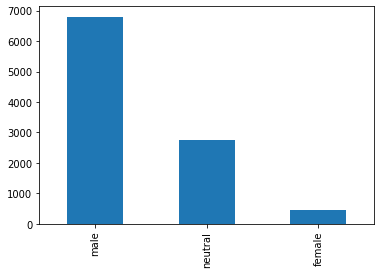

In [29]:
# plot of males and females as director
import matplotlib.pyplot as plt
%matplotlib inline
df["Director Gender"].value_counts().T.plot(kind='bar')
plt.show()

## Genre 1 Distribution

In [52]:
df["Genre 1"].unique()

array(['Drama', 'Action', 'Crime', 'Adventure', 'Biography', 'Mystery',
       'Animation', 'Comedy', 'Horror', 'Family', 'Fantasy', 'Thriller',
       'Romance', 'Sci-Fi', 'Documentary', 'Musical', 'Music'],
      dtype=object)

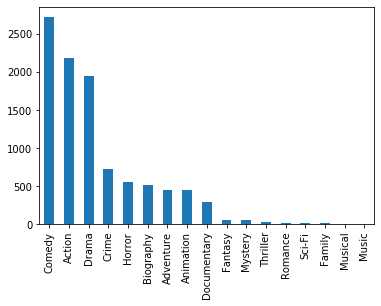

In [30]:
df["Genre 1"].value_counts().T.plot(kind='bar')
plt.show()

## Genre 2 Distribution

In [53]:
# unique genres
df['Genre 2'].unique()

array([None, ' Crime', ' Adventure', ' Drama', ' Romance', ' Sci-Fi',
       ' Thriller', ' Western', ' War', ' Mystery', ' Comedy', ' Horror',
       ' Fantasy', ' Music', ' Action', ' Sport', ' Family', ' Biography',
       ' History', ' Musical', ' News', ' Animation'], dtype=object)

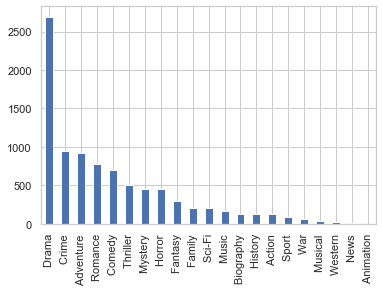

In [263]:
df["Genre 2"].value_counts().T.plot(kind='bar')
plt.show()

## Top 10 Lead Stars

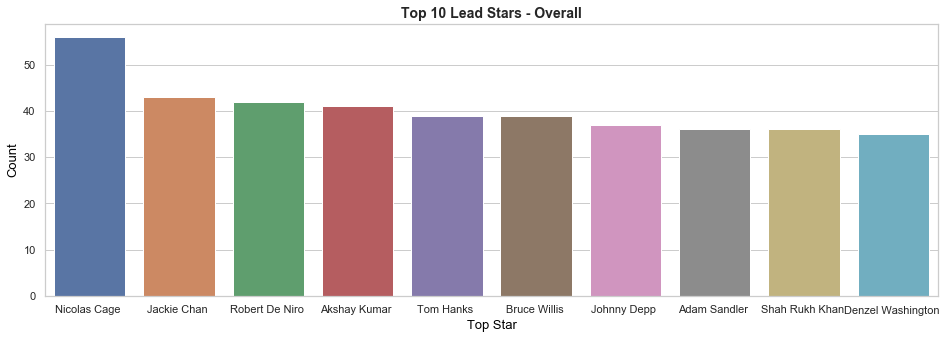

In [267]:
# top 10 lead stars overall
top10_directors = df["Top Star"].value_counts()[:10]
plt.figure(figsize=(16,5))
sns.set(style="whitegrid")
sns.barplot(top10_directors.index, top10_directors.values)
plt.xlabel("Top Star", fontsize=13, color="Black")
plt.ylabel("Count", fontsize=13, color="Black")
plt.title("Top 10 Lead Stars - Overall", fontsize = 14, fontweight="bold")
plt.show()

## Top 10 Directors

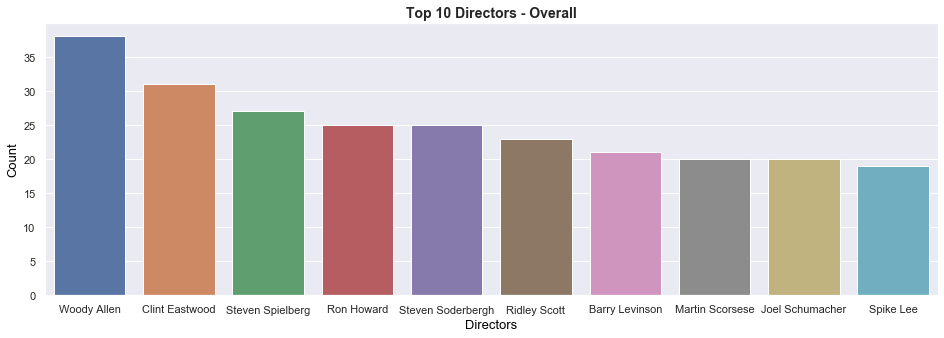

In [243]:
# top 10 directors overall
top10_directors = df["Director"].value_counts()[:10]
plt.figure(figsize=(16,5))
sns.set(style='darkgrid')
#top10_directors.plot(kind='bar')
sns.barplot(top10_directors.index, top10_directors.values)
plt.xlabel("Directors", fontsize=13, color="Black")
plt.ylabel("Count", fontsize=13, color="Black")
plt.title("Top 10 Directors - Overall", fontsize = 14, fontweight="bold")
plt.show()

**There are only male directors in top 10 - overall!**

## Plot of Gender Distribution in Genres - Absolute

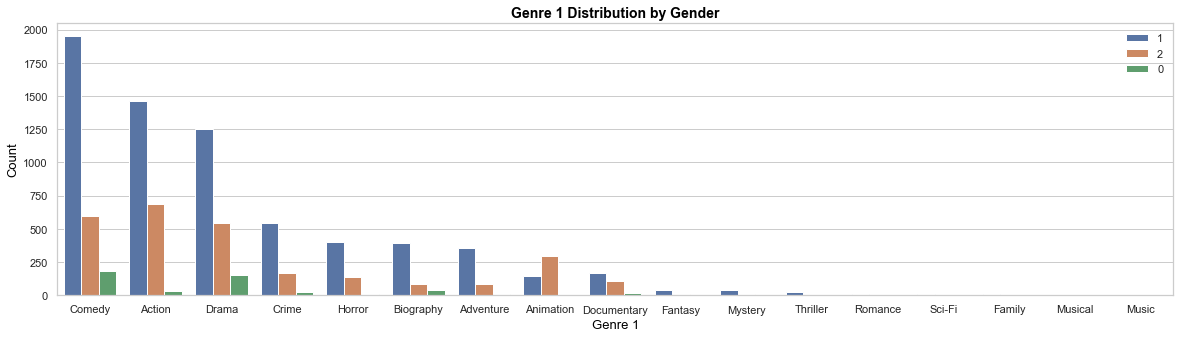

In [309]:
plt.figure(figsize=(20,5))
sns.set(style='whitegrid')
f = sns.countplot(x="Genre 1", data=df, hue="Director Gender", order = df['Genre 1'].value_counts().index, hue_order = df['Director Gender'].value_counts().index)
plt.xlabel("Genre 1", fontsize=13, color="Black")
plt.ylabel("Count", fontsize=13, color="Black")
plt.title("Genre 1 Distribution by Gender", fontsize=14, color="Black", fontweight="bold")
plt.legend(loc='upper right', frameon=False)
plt.show()

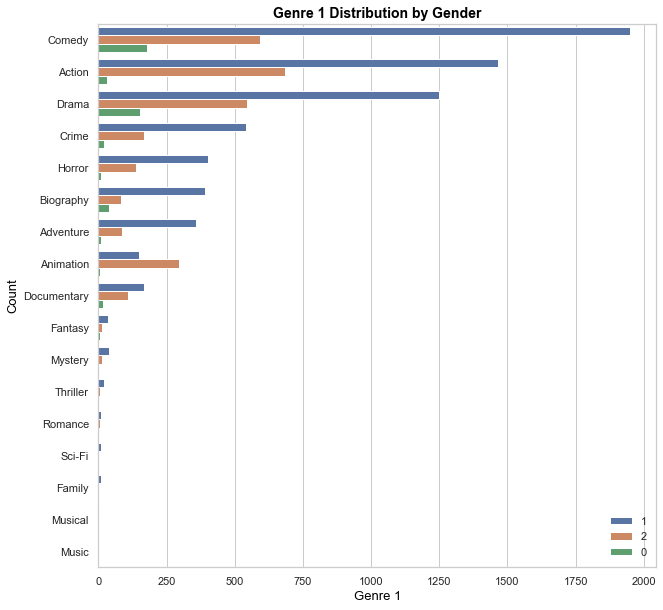

In [307]:
# inverse plot
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
f = sns.countplot(y="Genre 1", data=df, hue="Director Gender", order = df['Genre 1'].value_counts().index, hue_order = df['Director Gender'].value_counts().index)
plt.xlabel("Genre 1", fontsize=13, color="Black")
plt.ylabel("Count", fontsize=13, color="Black")
plt.title("Genre 1 Distribution by Gender", fontsize=14, color="Black", fontweight="bold")
plt.legend(loc='lower right', frameon=False)
plt.show()

## Plot of Gender Distribution in Genres - Proportions

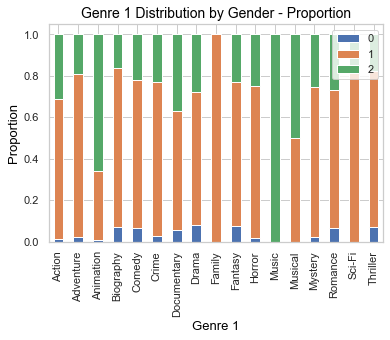

<Figure size 1440x360 with 0 Axes>

In [318]:
props = df.groupby("Genre 1")['Director Gender'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')
plt.xlabel("Genre 1", fontsize=13, color="Black")
plt.ylabel("Proportion", fontsize=13, color="Black")
plt.title("Genre 1 Distribution by Gender - Proportion", fontsize=14, color="Black")
plt.legend(loc="upper right")
plt.figure(figsize=(20,5))
plt.show()

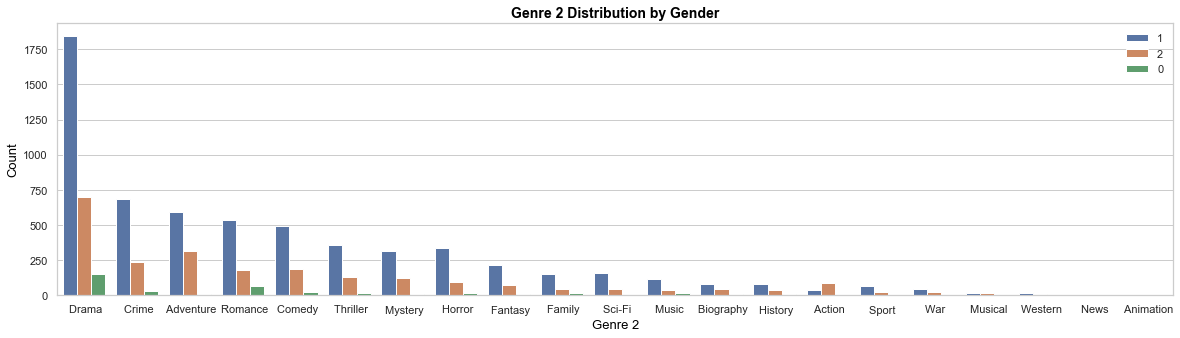

In [267]:
plt.figure(figsize=(20,5))
sns.set(style='whitegrid')
f = sns.countplot(x="Genre 2", data=df, hue="Director Gender", order = df['Genre 2'].value_counts().index, hue_order = df['Director Gender'].value_counts().index)
plt.xlabel("Genre 2", fontsize=13, color="Black")
plt.ylabel("Count", fontsize=13, color="Black")
plt.title("Genre 2 Distribution by Gender", fontsize=14, color="Black", fontweight="bold")
plt.legend(loc='upper right', frameon=False)
plt.show()

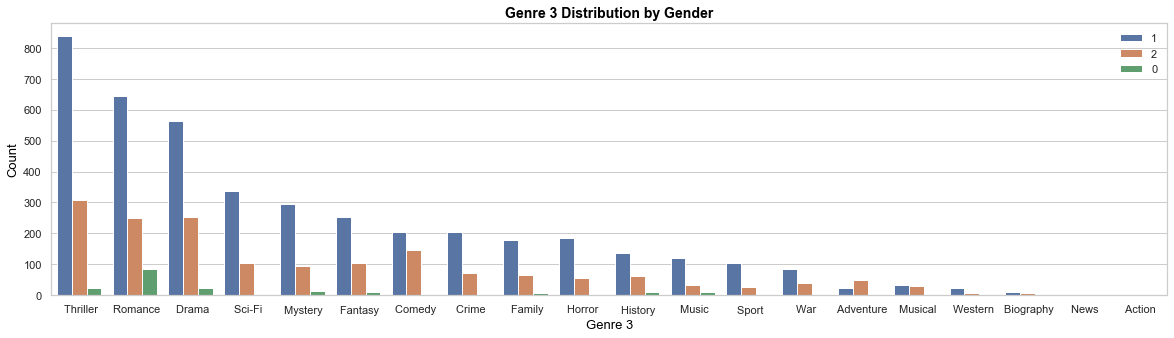

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,5))
sns.set(style='whitegrid')
f = sns.countplot(x="Genre 3", data=df, hue="Director Gender", order = df['Genre 3'].value_counts().index, hue_order = df['Director Gender'].value_counts().index)
plt.xlabel("Genre 3", fontsize=13, color="Black")
plt.ylabel("Count", fontsize=13, color="Black")
plt.title("Genre 3 Distribution by Gender", fontsize=14, color="Black", fontweight="bold")
plt.legend(loc='upper right', frameon=False)
plt.show()

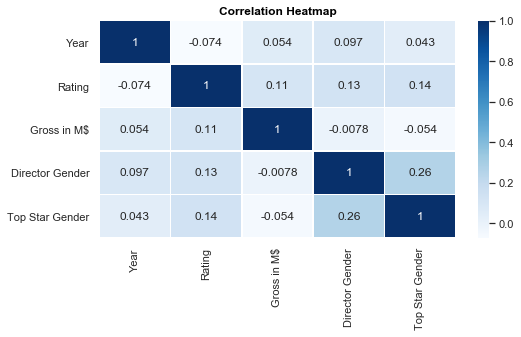

In [246]:
import seaborn as sns

plt.figure(figsize=(8,4))
ax = sns.heatmap(df.corr(), annot=True, linewidth = 0.5, cmap="Blues")
ax.set_title('Correlation Heatmap', fontweight="bold", color="Black")
plt.show()

In [127]:
df["Year Category"] = df["Year"].copy()
df["Year Category"] = np.where(df["Year Category"]<2000,"before 2000", "after 2000")
df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,...,Director First Name,Director Last Name,Director Gender,Top Star First Name,Top Star Last Name,Top Star Gender,Genre 1,Genre 2,Genre 3,Year Category
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,...,Frank,Darabont,1,Tim,Robbins,1,Drama,None,None,before 2000
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,...,Christopher,Nolan,1,Christian,Bale,1,Action,Crime,Drama,after 2000
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,...,Christopher,Nolan,1,Leonardo,DiCaprio,1,Action,Adventure,Sci-Fi,after 2000
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,...,David,Fincher,1,Brad,Pitt,1,Drama,None,None,before 2000
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,...,Quentin,Tarantino,1,John,Travolta,1,Crime,Drama,None,before 2000
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Robin Wright,Gary Sinise,...,Robert,Zemeckis,1,Tom,Hanks,1,Drama,Romance,None,before 2000
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,...,['Lana,"Wachowski, ', 'Lilly Wachowski']",2,Keanu,Reeves,2,Action,Sci-Fi,None,before 2000
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Ian McKellen,Orlando Bloom,...,Peter,Jackson,1,Elijah,Wood,1,Adventure,Drama,Fantasy,after 2000
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Viggo Mortensen,Ian McKellen,...,Peter,Jackson,1,Elijah,Wood,1,Adventure,Drama,Fantasy,after 2000
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Tom Hardy,Anne Hathaway,...,Christopher,Nolan,1,Christian,Bale,1,Action,Thriller,None,after 2000


## Genre Dataset Change

In [248]:
df2 = df.copy()
df2.head()

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender,Top Star First Name,Top Star Last Name,Top Star Gender,Genre 1,Genre 2,Genre 3
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank,Darabont,1,Tim,Robbins,1,Drama,None,None
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Christopher,Nolan,1,Christian,Bale,1,Action,Crime,Drama
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe,Christopher,Nolan,1,Leonardo,DiCaprio,1,Action,Adventure,Sci-Fi
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,David,Fincher,1,Brad,Pitt,1,Drama,None,None
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,Quentin,Tarantino,1,John,Travolta,1,Crime,Drama,None


In [249]:
df2.groupby(["Genre 1"]).mean()

,Year,Rating,Gross in M$,Director Gender,Top Star Gender
Genre 1,,,,,
Action,2005.283028,6.260459,58.630377,1.299541,1.179817
Adventure,2002.163717,6.437389,53.456534,1.168142,1.037611
Animation,2005.832215,6.793065,88.994602,1.651007,1.156600
Biography,2006.746094,7.047461,24.616504,1.091797,0.974609
Comedy,2003.346069,6.303600,26.858944,1.152461,1.000367
Crime,2003.950685,6.733014,19.737278,1.201370,1.064384
Documentary,2009.065292,7.429897,7.409404,1.312715,1.099656
Drama,2005.461459,6.797893,19.191809,1.202467,1.031860
Family,1996.000000,6.075000,129.106250,1.000000,0.875000


In [224]:
newdf = df[df.columns[-3:]]

In [225]:
newdf.head()

,Genre 1,Genre 2,Genre 3
0,Drama,None,None
1,Action,Crime,Drama
2,Action,Adventure,Sci-Fi
3,Drama,None,None
4,Crime,Drama,None


In [227]:
newdf.apply(pd.Series.value_counts).groupby(['Top Star Gender'])

KeyError: 'Top Star Gender'

# Star Names List

In [8]:
# load the text document
f = open("/Users/moritzschneider/Documents/Uni/Copenhagen/Social Data Science/Git Group/Group-31-SoDa/Data/female_name.txt", "r")
f

<_io.TextIOWrapper name='/Users/moritzschneider/Documents/Uni/Copenhagen/Social Data Science/Git Group/Group-31-SoDa/Data/female_name.txt' mode='r' encoding='UTF-8'>

In [11]:
# print the text file to get a first impression of its looks

for line in f:
    print(line)

['Natalie Portman', 'Anne Hathaway', 'Talia Shire', 'Diane Keaton', 'Keira Knightley', 'Uma Thurman', 'Jennifer Lawrence', 'Julianne Moore', 'Amy Adams', 'Cate Blanchett', 'Marion Cotillard', 'Helena Bonham Carter', 'Jessica Chastain', 'Kate Winslet', 'Scarlett Johansson', 'Léa Seydoux', 'Robin Wright', 'Vera Farmiga', 'Tilda Swinton', 'Gwyneth Paltrow', 'Carrie-Anne Moss', 'Maggie Gyllenhaal', 'Jennifer Connelly', 'Judi Dench', 'Jodie Foster', 'Meryl Streep', 'Carrie Fisher', 'Amanda Plummer', 'Sigourney Weaver', 'Frances McDormand', 'Sandra Bullock', 'Rebecca Hall', 'Sally Field', 'Daryl Hannah', 'Juno Temple', 'Naomie Harris', 'Julia Roberts', 'Emily Mortimer', 'Naomi Watts', 'Nicole Kidman', 'Emma Stone', 'Jennifer Garner', 'Michelle Williams', 'Carey Mulligan', 'Mélanie Laurent', 'Melissa Leo', 'Kathy Bates', 'Rachel McAdams', 'Winona Ryder', 'Viola Davis', 'Toni Collette', 'Emma Watson', 'Patricia Clarkson', 'Rosanna Arquette', 'Ellen Page', 'Catherine Keener', 'Elle Fanning', 'K

## Star Name List Preparation

In [12]:
line.split(",")

["['Natalie Portman'",
 " 'Anne Hathaway'",
 " 'Talia Shire'",
 " 'Diane Keaton'",
 " 'Keira Knightley'",
 " 'Uma Thurman'",
 " 'Jennifer Lawrence'",
 " 'Julianne Moore'",
 " 'Amy Adams'",
 " 'Cate Blanchett'",
 " 'Marion Cotillard'",
 " 'Helena Bonham Carter'",
 " 'Jessica Chastain'",
 " 'Kate Winslet'",
 " 'Scarlett Johansson'",
 " 'Léa Seydoux'",
 " 'Robin Wright'",
 " 'Vera Farmiga'",
 " 'Tilda Swinton'",
 " 'Gwyneth Paltrow'",
 " 'Carrie-Anne Moss'",
 " 'Maggie Gyllenhaal'",
 " 'Jennifer Connelly'",
 " 'Judi Dench'",
 " 'Jodie Foster'",
 " 'Meryl Streep'",
 " 'Carrie Fisher'",
 " 'Amanda Plummer'",
 " 'Sigourney Weaver'",
 " 'Frances McDormand'",
 " 'Sandra Bullock'",
 " 'Rebecca Hall'",
 " 'Sally Field'",
 " 'Daryl Hannah'",
 " 'Juno Temple'",
 " 'Naomie Harris'",
 " 'Julia Roberts'",
 " 'Emily Mortimer'",
 " 'Naomi Watts'",
 " 'Nicole Kidman'",
 " 'Emma Stone'",
 " 'Jennifer Garner'",
 " 'Michelle Williams'",
 " 'Carey Mulligan'",
 " 'Mélanie Laurent'",
 " 'Melissa Leo'",
 " 'Ka

In [14]:
import pandas as pd
Liste = line.split(",")
Liste

s = pd.Series(Liste)
s = s.str.replace("[","")
s = s.str.replace("]","")
s = s.str.replace("\n","")
s = s.str.replace("'","")
df2 = pd.DataFrame(s)
df2.head()

,0
0,Natalie Portman
1,Anne Hathaway
2,Talia Shire
3,Diane Keaton
4,Keira Knightley
